**<h1>WATER QUALITY CHECK</h1>**

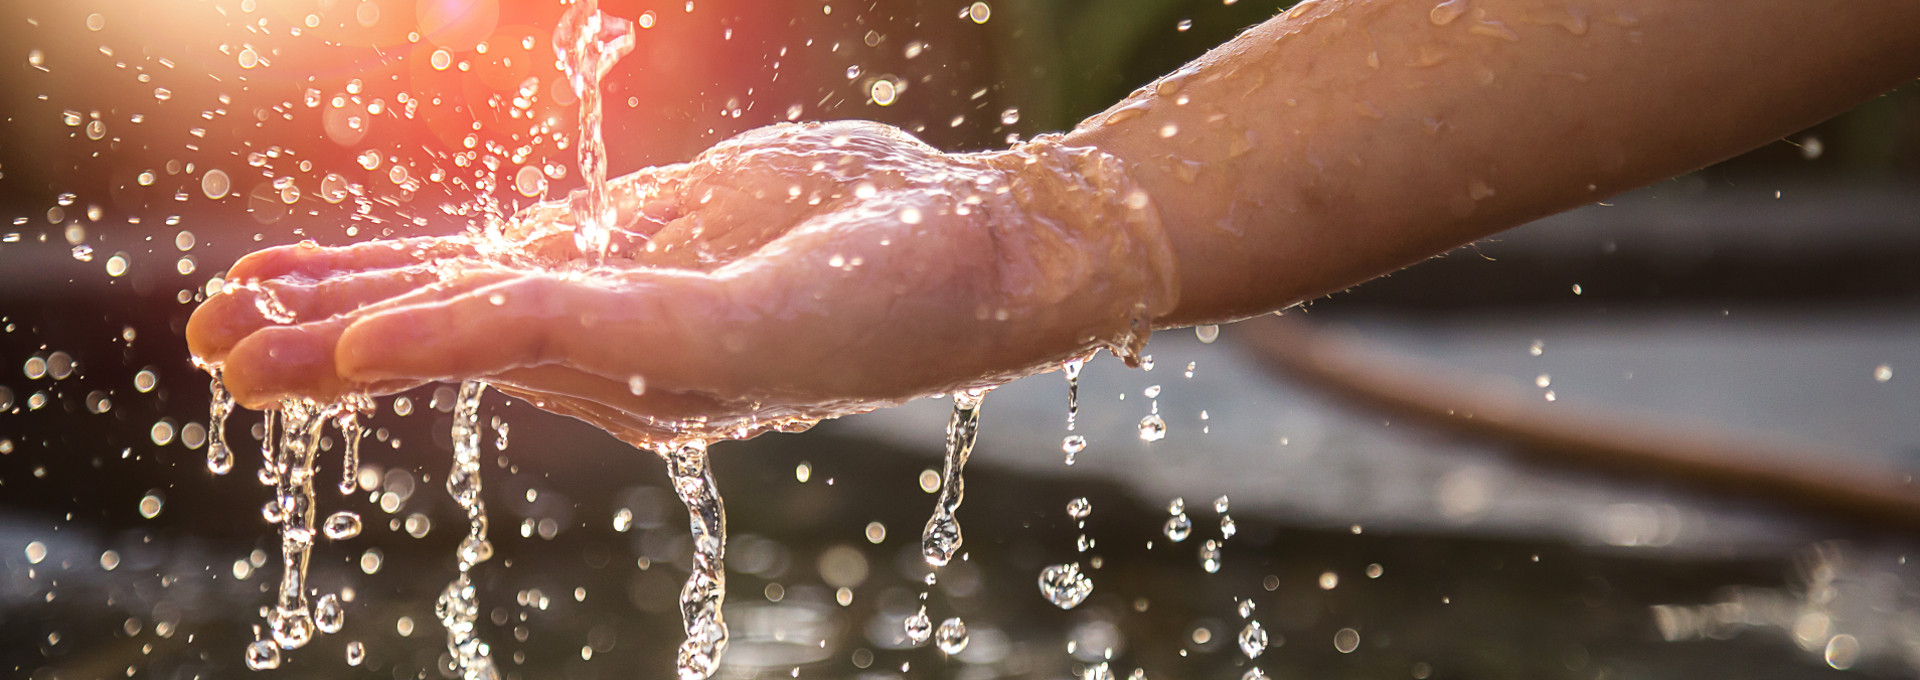

Water quality refers to the chemical, physical, and biological characteristics of water based on the standards of its usage. The most common standards used to monitor and assess water quality convey the health of ecosystems, safety of human contact, and condition of drinking water.
Potability Testing ensures the safety of the homes well water supply.Drinking water, also known as potable water, is water that is safe to drink or use for food preparation.

**<h2>Problem Statement<h2/>**

Based on the features given in the dataset need to predict the predility of water.
Predility is 1 the water is safe to drink, if it is 0 then it is unsafe to drink.

**<h2>Real world/Business Objectives and Constraints </h2>**


1.   The cost of a mis-classification can be very high 
2.   No strict latency concerns.
3.   Interpretability is partially important



**<h3>Data Overview</h3>**

1. Water potablity data consists of 10 columns those are : 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability
2. It has 3276 rows.

**<h3> Performance Metric</h3>**



1.   Accuracy
2.   Confusion matrix
3.   Precisiion and Recall


**<h2>Models</h2>**



1.   Logistic Regression
2.   SVC
3.   Random Forest
4.   DecisionTree
5.   KNearestNeighbors
6.   XGBoost



<h2> Exploratory Data Analysis<h2/>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import plotly.offline as py
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Reading Data**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/my code/water_potability.csv')

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
data.shape

(3276, 10)

In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Checking if there are any null values and removing them

In [ ]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
data.dropna(inplace = True)
data.shape


(2011, 10)

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


Distribution of data points among classes of potability

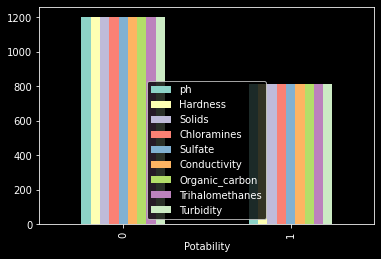

In [ ]:
data.groupby("Potability").count().plot.bar()

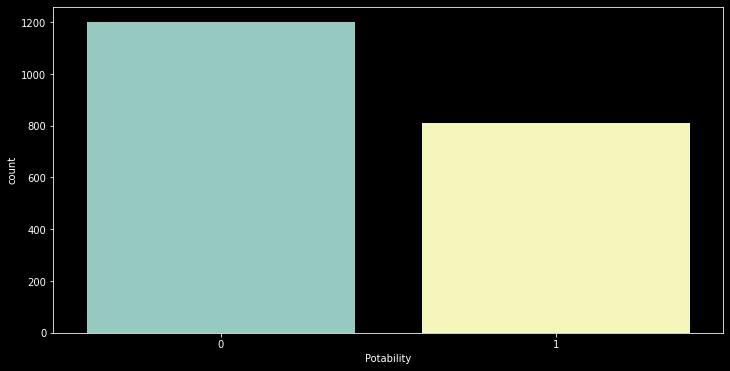

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Potability", data=data);


In [ ]:
non_potable = data[data['Potability']==0]
percent_non_potable = len(non_potable)/ len(data)
print('The percentage of non potable water is: {}%'.format(round(percent_non_potable * 100,4)))
print("The percentage of potable water is:{}%".format(round((1-percent_non_potable)*100,4)))

The percentage of non potable water is: 59.6718%
The percentage of potable water is:40.3282%




1.   From the above calculations it is found that more than 50% of water is non potable water.
2.  Only 40% of total water is suitable to drink.



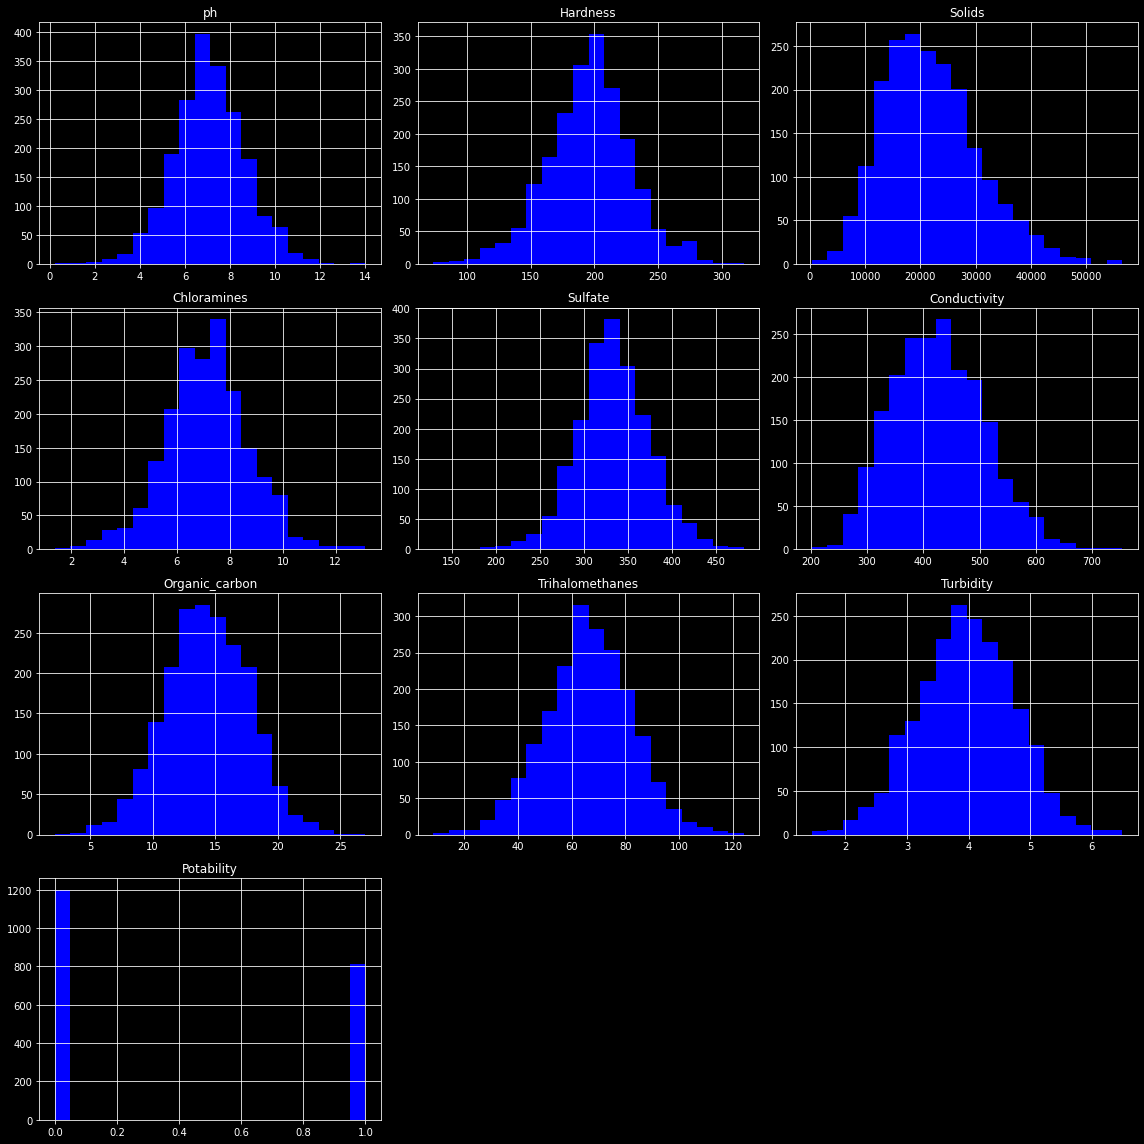

In [ ]:
data.hist(bins=20, color = 'blue', figsize=(16,16))
plt.tight_layout()

100%|██████████| 9/9 [00:01<00:00,  6.50it/s]


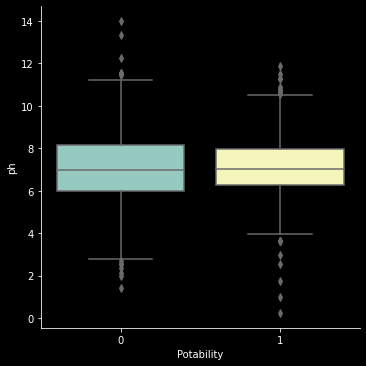

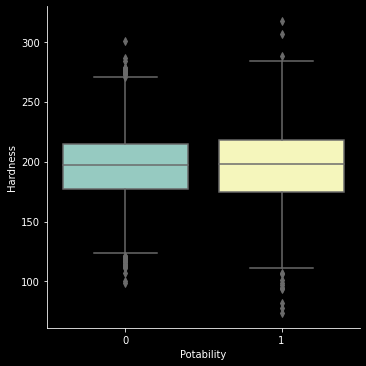

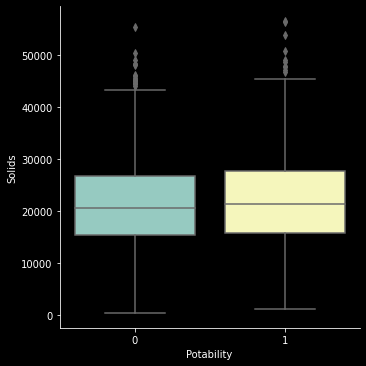

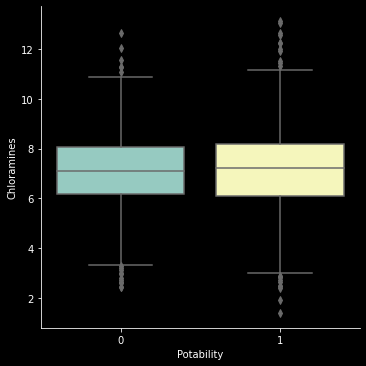

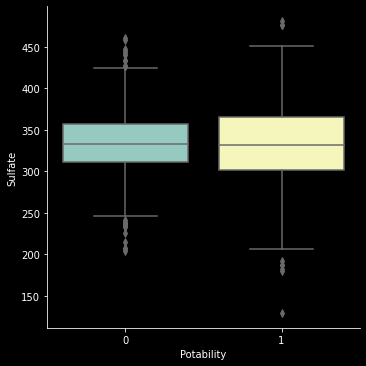

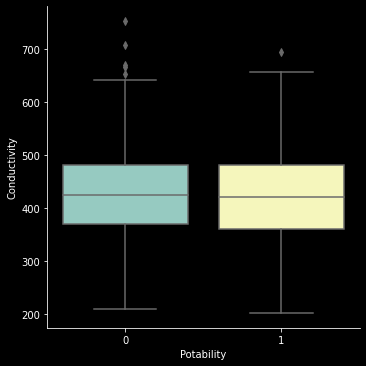

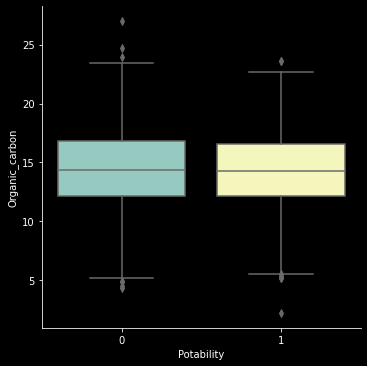

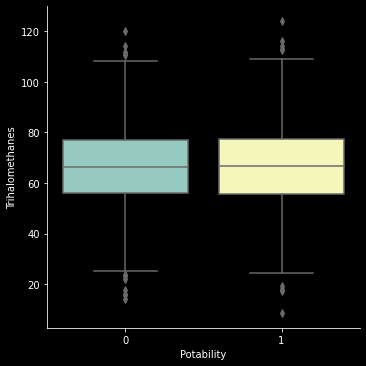

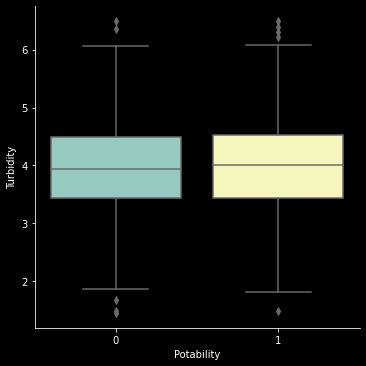

In [ ]:

column_name = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

def col_boxplot(data, columns):
  sns.catplot(x = "Potability",y = columns, data=data,kind = 'box')
  
for col in tqdm(column_name):
  col_boxplot(data,col)


**Obsrevation:** 

From all the above box plots we can say that the dataset is balanced dataset.

**Finding The Correlation Between Features**

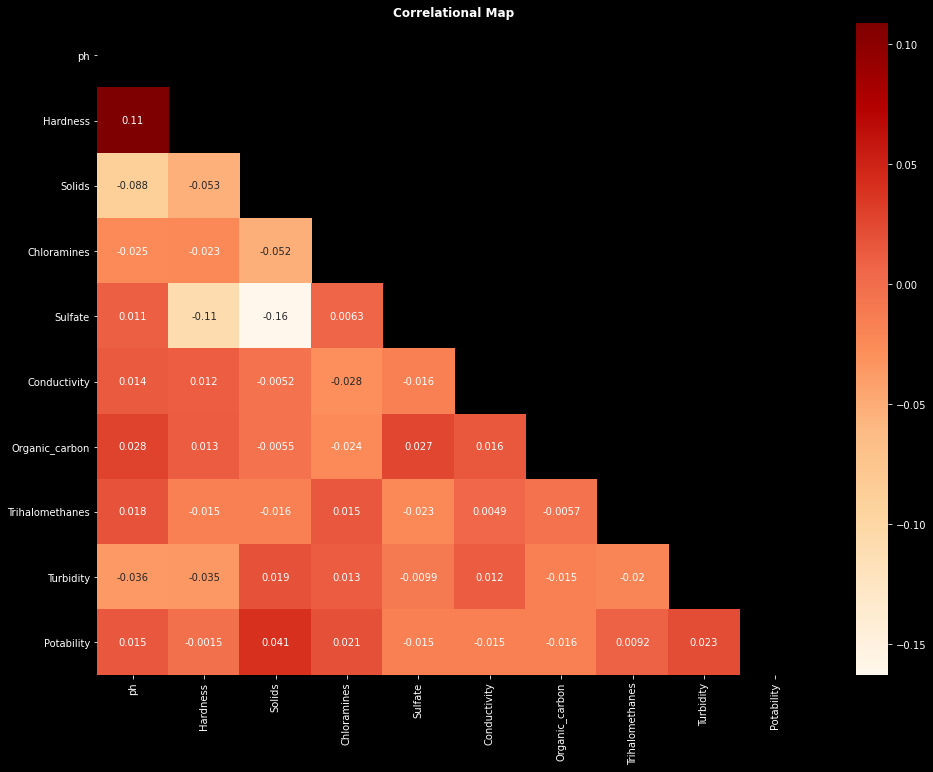

In [ ]:
plt.figure(figsize=(16,12))
matrix = np.triu(data.corr()) # matrix to return k -th diagonal zeroed values.
sns.heatmap(data.corr(), annot=True, mask=matrix, cmap='OrRd') # creating correlational map
plt.title('Correlational Map', weight='bold');

**Observation:**

The data shows very less correlation between all the features.

**Function to Plot Confusion Matrix**

In [ ]:
def plot_confusion_matrix(y_test,y_pred):
  C = confusion_matrix(y_test,y_pred)
  A = (((C.T)/(C.sum(axis = 1))).T)
  B = (C / C.sum(axis =0))
  plt.figure(figsize = (20,4))
  labels = [0,1]
  cmap =sns.light_palette("blue")
  plt.subplot(1,3,1)
  sns.heatmap(C,annot= True,cmap=cmap,fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.title('Confusion matrix')

  plt.subplot(1,3,2)
  sns.heatmap(B,annot=True, cmap=cmap,fmt=".3f",
              xticklabels=labels,yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.title('Precision matrix')

  plt.subplot(1,3,3)
  sns.heatmap(A,annot=True,cmap=cmap,fmt=".3f",
              xticklabels=labels,yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.title('Recall matrix')
  plt.show()

**<h2>Splitting Data into X_train,Y_train, X_test and Y_test</h2>**

In [ ]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


In [ ]:
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
X_train.shape, X_test.shape

((1608, 9), (403, 9))

In [ ]:

model_dict={'Logistic Regression': LogisticRegression(),
'SVC' : SVC(),
'Random Forest' : RandomForestClassifier(n_jobs=-1),
'DecisionTree': DecisionTreeClassifier(),
'KNearestNeighbors': KNeighborsClassifier(),
'XGBoost': XGBClassifier()}


In [ ]:
'''Defining  function to create a model with accuracy score and confusion matrix;
        model: Takes different model alogirthm as an input for the operation.
    '''

def Model(models):
  models.fit(X_train, y_train)
  y_pred=models.predict(X_test)
  print("The accuracy score of model is:{}%".format(accuracy_score(y_test, y_pred)))
  print('-'*50)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print("Test confusion Matrix",plot_confusion_matrix(y_test,y_pred))


--------------------------------------------------
Logistic Regression
The accuracy score of model is:0.5707196029776674%
--------------------------------------------------
[[230   1]
 [172   0]]
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       231
           1       0.00      0.00      0.00       172

    accuracy                           0.57       403
   macro avg       0.29      0.50      0.36       403
weighted avg       0.33      0.57      0.42       403



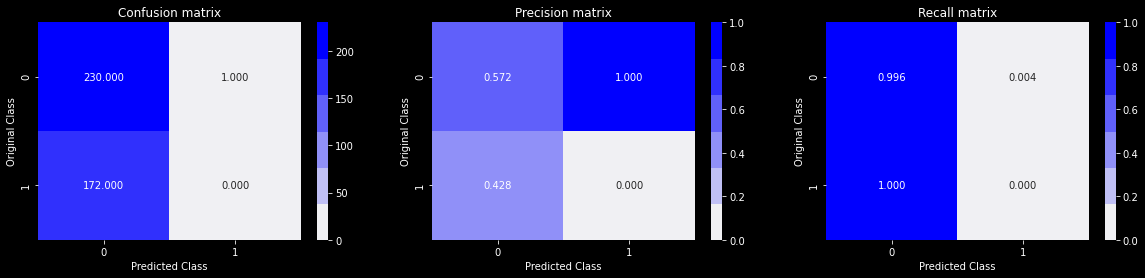

Test confusion Matrix None
--------------------------------------------------
SVC
The accuracy score of model is:0.6724565756823822%
--------------------------------------------------
[[207  24]
 [108  64]]
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       231
           1       0.73      0.37      0.49       172

    accuracy                           0.67       403
   macro avg       0.69      0.63      0.63       403
weighted avg       0.69      0.67      0.64       403



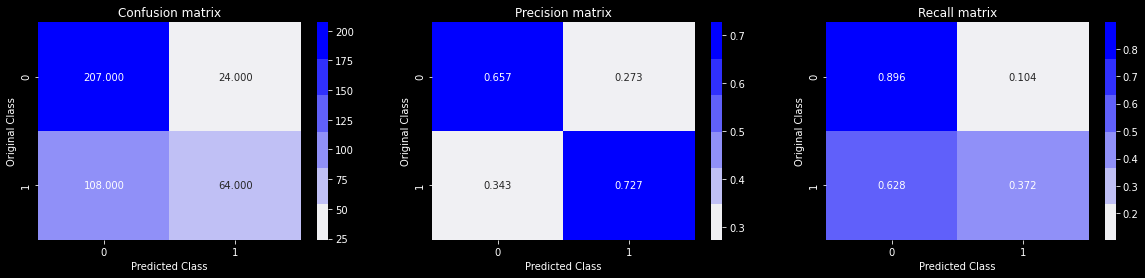

Test confusion Matrix None
--------------------------------------------------
Random Forest
The accuracy score of model is:0.6823821339950372%
--------------------------------------------------
[[198  33]
 [ 95  77]]
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       231
           1       0.70      0.45      0.55       172

    accuracy                           0.68       403
   macro avg       0.69      0.65      0.65       403
weighted avg       0.69      0.68      0.67       403



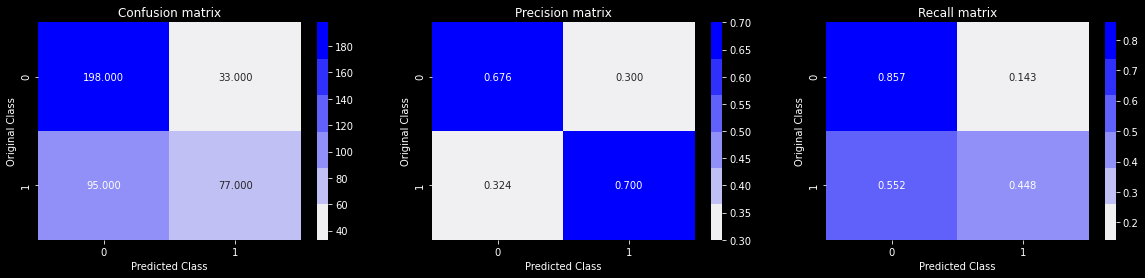

Test confusion Matrix None
--------------------------------------------------
DecisionTree
The accuracy score of model is:0.6352357320099256%
--------------------------------------------------
[[164  67]
 [ 80  92]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       231
           1       0.58      0.53      0.56       172

    accuracy                           0.64       403
   macro avg       0.63      0.62      0.62       403
weighted avg       0.63      0.64      0.63       403



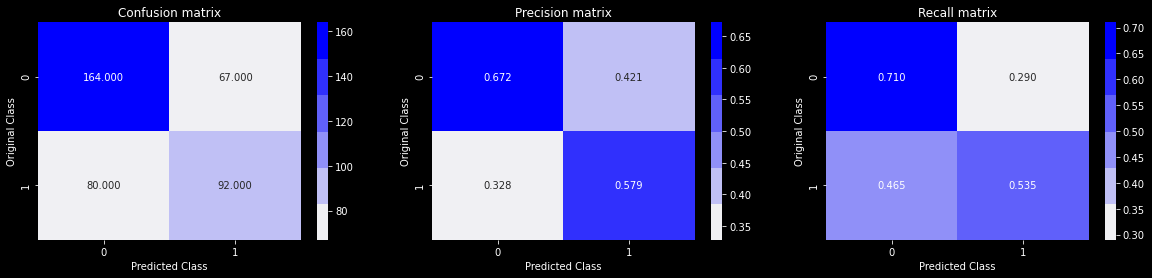

Test confusion Matrix None
--------------------------------------------------
KNearestNeighbors
The accuracy score of model is:0.6253101736972705%
--------------------------------------------------
[[177  54]
 [ 97  75]]
              precision    recall  f1-score   support

           0       0.65      0.77      0.70       231
           1       0.58      0.44      0.50       172

    accuracy                           0.63       403
   macro avg       0.61      0.60      0.60       403
weighted avg       0.62      0.63      0.61       403



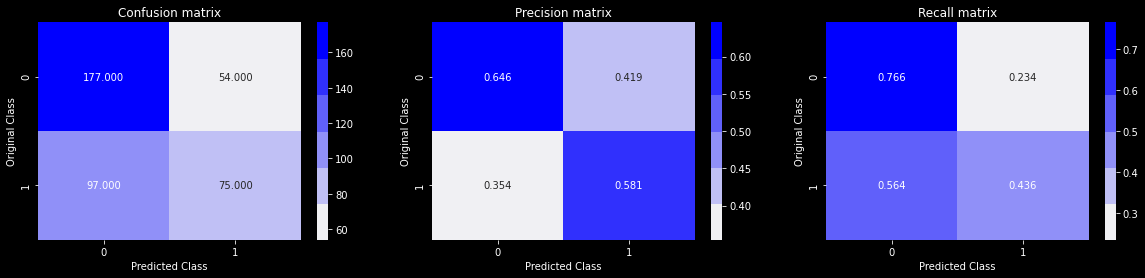

Test confusion Matrix None
--------------------------------------------------
XGBoost
The accuracy score of model is:0.6476426799007444%
--------------------------------------------------
[[198  33]
 [109  63]]
              precision    recall  f1-score   support

           0       0.64      0.86      0.74       231
           1       0.66      0.37      0.47       172

    accuracy                           0.65       403
   macro avg       0.65      0.61      0.60       403
weighted avg       0.65      0.65      0.62       403



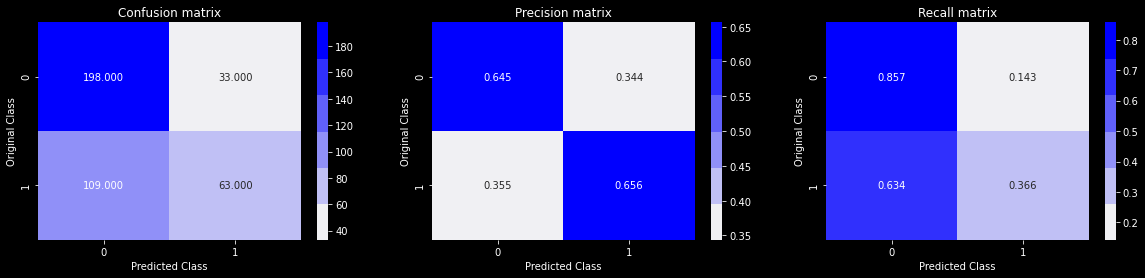

Test confusion Matrix None


In [ ]:
'''Defining   Function to find the model accuracy score, classification report;
'''

def model_evaluation(param):
  for name, model in param.items():
    print('-'*50)
    print(name)
    evaluation = Model(model)
  return evaluation

evaluation = model_evaluation(model_dict)

In [ ]:
accuracy_scores_model={
    'Logistic_Regression':57.07,
    'SVC' : 67.24,
    'Random Forest' : 67.24,
    'DecisionTree': 62.03,
    'KNearestNeighbors': 62.53,
    'XGBoost':64.74
}




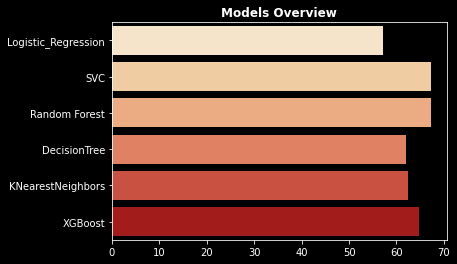

In [ ]:
def models_overview(accuracy_scores_model):
    model_accuracy = list(accuracy_scores_model.values())
    model_name = list(accuracy_scores_model.keys())

    g = sns.barplot(x = model_accuracy, y = model_name,palette='OrRd')
    plt.title('Models Overview', weight='bold');
    return g
    
over_view = models_overview(accuracy_scores_model)

**CONCLUSION:**

* Models SVC AND Random_Forest both gave the accuracy of 67.24% .
* Recall from both model are as follows
      1) Random-Forest:
          '0':0.86
          '1':0.45
      2) SVC:
           '0': 90
           '1': 37
* Considering recall and accuracy_score, SVC found to be better model as compared to all other algorithms.
*  Precision and Recall holds a top priority while selecting the best model.